## Predicting Time of Delivery on Industrial dataset

### Importing Necessary Libraries

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#### Importing the dataset

In [192]:
data = pd.read_excel("../data_!/new.xlsx")

In [193]:
data.head()

,Customer_ID,Latitude,Longitude,City,date_of_delivery(dd/mm/yyyy),Type_of_Product,Quantity,Time_of_Delivery(hrs)
0,A101,48.115334,-1.676348,Rennes,2020-01-01,Perishable,5,1405
1,A102,48.088967,-1.660292,Rennes,2020-01-02,Perishable,6,1405
2,A103,47.216827,-1.557359,Rennes,2020-01-03,Perishable,7,1405
3,A104,48.122202,-1.632854,Rennes,2020-01-04,Perishable,8,1405
4,A105,48.132581,-1.658611,Rennes,2020-01-05,Perishable,9,1405


In [194]:
# Shape of the datset
print("The shape of the dataset (rows,colums) is",data.shape)

The shape of the dataset (rows,colums) is (20008, 8)


In [195]:
# Datatypes of each column in the dataset
data.dtypes

Customer_ID                             object
Latitude                               float64
Longitude                              float64
City                                    object
date_of_delivery(dd/mm/yyyy)    datetime64[ns]
Type_of_Product                         object
Quantity                                 int64
Time_of_Delivery(hrs)                    int64
dtype: object

#### Converting into categorical types

In [196]:
data['Customer_ID'] = data['Customer_ID'].astype('category')

In [197]:
data['Type_of_Product'] = data['Type_of_Product'].astype('category')

In [198]:
print("The count of Type of Product")
data['Type_of_Product'].value_counts()

The count of Type of Product


Non-Perishable    10192
Perishable         9816
Name: Type_of_Product, dtype: int64

In [199]:
np = data[data['Type_of_Product'] == 'Non-Perishable'].shape[0]

In [200]:
p = data[data['Type_of_Product'] == 'Perishable'].shape[0]

Text(0, 0.5, 'Count')

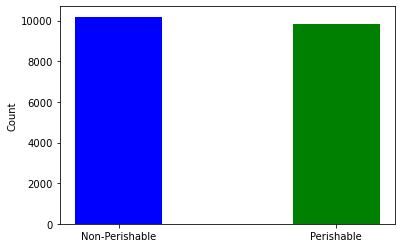

In [201]:
plt.bar(['np','p'],(np,p),width = 0.4,tick_label = ['Non-Perishable','Perishable'],color= ['blue','green'])
plt.ylabel("Count")

In [202]:
print("The number of unique Customer are",len(data['Customer_ID'].unique()))

The number of unique Customer are 50


In [203]:
print("The duration of delivery(Working hours for the delivery executive) is",
     str((max(data['Time_of_Delivery(hrs)']) - min(data['Time_of_Delivery(hrs)']))/100)+" hrs")


The duration of delivery(Working hours for the delivery executive) is 8.0 hrs


In [204]:
print("-----------------------------------------------------------------------------")
print("In the dataset, the delivery starts at",str(min(data['Time_of_Delivery(hrs)'])) + "am "
     +"and ends at",str(max(data['Time_of_Delivery(hrs)'])) + "pm")
print("-----------------------------------------------------------------------------")
print("The duration of delivery(Working hours for the delivery executive) is",
     str((max(data['Time_of_Delivery(hrs)']) - min(data['Time_of_Delivery(hrs)']))/100)+" hrs")

-----------------------------------------------------------------------------
In the dataset, the delivery starts at 900am and ends at 1700pm
-----------------------------------------------------------------------------
The duration of delivery(Working hours for the delivery executive) is 8.0 hrs


In [205]:
check = pd.DataFrame(data['Time_of_Delivery(hrs)'].value_counts())

In [206]:
check

,Time_of_Delivery(hrs)
1559,118
1125,117
1653,117
1541,117
1509,117
...,...
938,117
922,117
906,117
1657,117


#### Checking for NULL values

In [207]:
data.isnull().sum()

Customer_ID                     0
Latitude                        0
Longitude                       0
City                            0
date_of_delivery(dd/mm/yyyy)    0
Type_of_Product                 0
Quantity                        0
Time_of_Delivery(hrs)           0
dtype: int64

#### Deriving new features using the date_of_delivery column

In [208]:
data["Year"] = data["date_of_delivery(dd/mm/yyyy)"].dt.year

In [209]:

data["Month"] = data["date_of_delivery(dd/mm/yyyy)"].dt.month

In [210]:
data["Day"] = data["date_of_delivery(dd/mm/yyyy)"].dt.day

#### Dropping unnecessary columns

In [211]:
data.columns

Index(['Customer_ID', 'Latitude', 'Longitude', 'City',
       'date_of_delivery(dd/mm/yyyy)', 'Type_of_Product', 'Quantity',
       'Time_of_Delivery(hrs)', 'Year', 'Month', 'Day'],
      dtype='object')

In [212]:
data = data.drop(['date_of_delivery(dd/mm/yyyy)','City','Customer_ID'],axis = 1)

In [213]:
data.columns

Index(['Latitude', 'Longitude', 'Type_of_Product', 'Quantity',
       'Time_of_Delivery(hrs)', 'Year', 'Month', 'Day'],
      dtype='object')

In [214]:
data.dtypes

Latitude                  float64
Longitude                 float64
Type_of_Product          category
Quantity                    int64
Time_of_Delivery(hrs)       int64
Year                        int64
Month                       int64
Day                         int64
dtype: object

#### Dummifying categorical variables

In [215]:
data1 = pd.get_dummies(data,drop_first = True)

In [216]:
data1.columns

Index(['Latitude', 'Longitude', 'Quantity', 'Time_of_Delivery(hrs)', 'Year',
       'Month', 'Day', 'Type_of_Product_Perishable'],
      dtype='object')

In [217]:
data1.head()

,Latitude,Longitude,Quantity,Time_of_Delivery(hrs),Year,Month,Day,Type_of_Product_Perishable
0,48.115334,-1.676348,5,1405,2020,1,1,1
1,48.088967,-1.660292,6,1405,2020,1,2,1
2,47.216827,-1.557359,7,1405,2020,1,3,1
3,48.122202,-1.632854,8,1405,2020,1,4,1
4,48.132581,-1.658611,9,1405,2020,1,5,1


#### Checking for the correlation between the numerical variables

In [218]:
num_attr = data1.select_dtypes(include=['int64', 'float64']).columns
num_attr

Index(['Latitude', 'Longitude', 'Quantity', 'Time_of_Delivery(hrs)', 'Year',
       'Month', 'Day'],
      dtype='object')

In [219]:
data1[num_attr].corr()

,Latitude,Longitude,Quantity,Time_of_Delivery(hrs),Year,Month,Day
Latitude,1.000000,-0.468416,0.000036,0.000622,0.007173,0.003994,0.004467
Longitude,-0.468416,1.000000,-0.011871,-0.000390,0.006844,0.000118,-0.008268
Quantity,0.000036,-0.011871,1.000000,-0.004105,-0.007031,0.024958,-0.002659
Time_of_Delivery(hrs),0.000622,-0.000390,-0.004105,1.000000,-0.009329,0.001178,-0.003098
Year,0.007173,0.006844,-0.007031,-0.009329,1.000000,-0.481357,-0.054671
Month,0.003994,0.000118,0.024958,0.001178,-0.481357,1.000000,0.012972
Day,0.004467,-0.008268,-0.002659,-0.003098,-0.054671,0.012972,1.000000


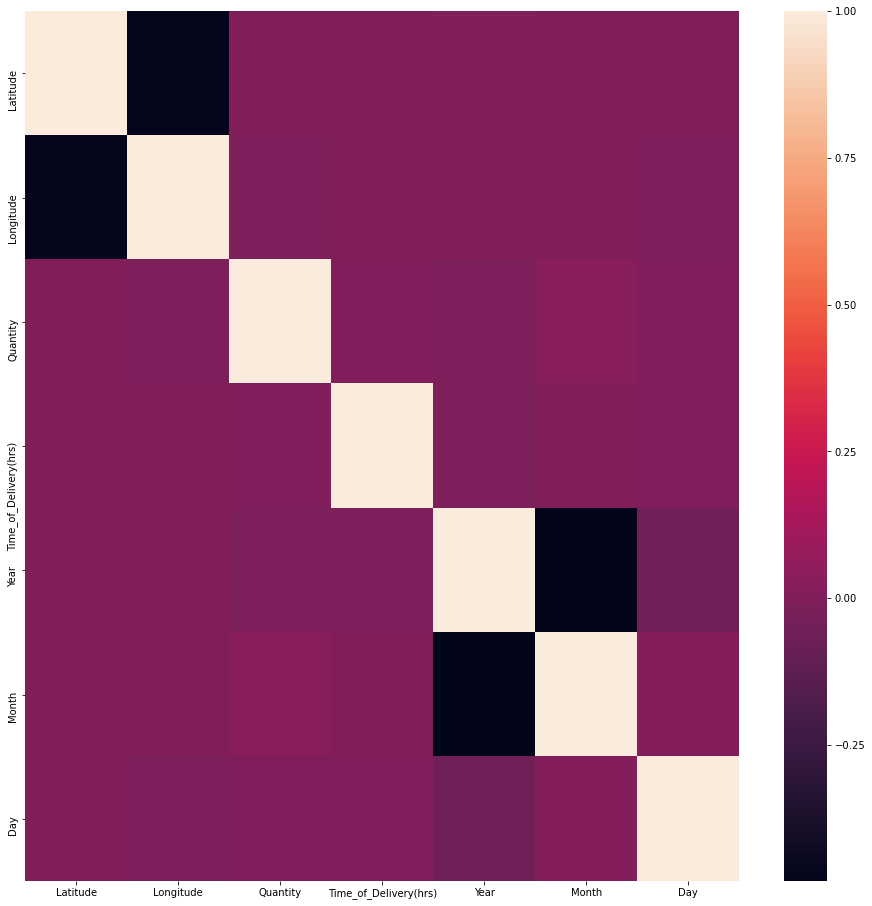

Note :-A correlation of 0 means that no relationship exists between the two variables, whereas a correlation of 1 indicates a perfect positive relationship.


In [220]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr())
plt.show()

print("Note :-A correlation of 0 means that no relationship exists between the two variables, whereas a correlation of 1 indicates a perfect positive relationship.")

#### Splitting the dataset into train and test

In [221]:
X = data1.copy()

In [222]:
X.columns

Index(['Latitude', 'Longitude', 'Quantity', 'Time_of_Delivery(hrs)', 'Year',
       'Month', 'Day', 'Type_of_Product_Perishable'],
      dtype='object')

In [223]:
X = X.drop(['Time_of_Delivery(hrs)'],axis = 1)

In [224]:
X.columns

Index(['Latitude', 'Longitude', 'Quantity', 'Year', 'Month', 'Day',
       'Type_of_Product_Perishable'],
      dtype='object')

In [225]:
y = data1['Time_of_Delivery(hrs)']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

#### Standardizing the dataset

In [227]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [228]:
X_train_std = scale.transform(X_train)
X_test_std = scale.transform(X_test)

### Feeding the dataset to various algorithms

#### Linear Regression

In [229]:
linreg = LinearRegression() 

In [230]:
linreg.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [231]:
print ("The coefficients are", linreg.coef_)
print ("The intercept is: ", linreg.intercept_)

The coefficients are [-0.89358083 -0.7416271  -1.66871724 -4.27159284 -2.29703046  0.36926686
 -2.30468387]
The intercept is:  1210.6380107459702


In [237]:
train_pred_linear = linreg.predict(X_train_std)
test_pred_linear = linreg.predict(X_test_std)

In [280]:
from sklearn.metrics import mean_absolute_error
import math

In [285]:
mae_linear = mean_absolute_error(y_test,test_pred_linear)

In [286]:
mse_linear = mean_squared_error(y_test,test_pred_linear)

In [287]:
rmse_linear = math.sqrt(mean_squared_error(y_test,test_pred_linear))

In [297]:
r2_linear = r2_score(y_pred=test_pred_linear, y_true=y_test)
n = len(y_test)
p = X_test_std.shape[1]
adj_r_linear = 1 - ((1 - r2_linear) * (n - 1)) / (n - p - 1)

In [298]:
print("For Linear Regression:")
print("Mean Absolute Error is",mae_linear)
print("Mean Squared Error is",mse_linear)
print("Root Mean Squared Error is",math.sqrt(mse_linear))
print("Adjusted R2 value is",adj_r_linear)

For Linear Regression:
Mean Absolute Error is 116.6067516851696
Mean Squared Error is 34314.954300047444
Root Mean Squared Error is 185.24296019025243
Adjusted R2 value is 0.1180897900512945


#### Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
regr_1 = DecisionTreeRegressor(max_depth = 15)

In [42]:
regr_1.fit(X_train_std, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [43]:
train_pred_DT = regr_1.predict(X_train_std)
test_pred_DT = regr_1.predict(X_test_std)

In [292]:
mae_DT = mean_absolute_error(y_test,test_pred_DT)

In [293]:
mse_DT = mean_squared_error(y_test,test_pred_DT)

In [294]:
rmse_DT = math.sqrt(mean_squared_error(y_test,test_pred_DT))

In [299]:
r2_DT = r2_score(y_pred=test_pred_DT, y_true=y_test)
n = len(y_test)
p = X_test_std.shape[1]
adj_r_DT = 1 - ((1 - r2_DT) * (n - 1)) / (n - p - 1)

In [301]:
print("For Decision Tree Regressor:")
print("Mean Absolute Error is",mae_DT)
print("Mean Squared Error is",mse_DT)
print("Root Mean Squared Error is",math.sqrt(mse_DT))
print("Adjusted R2 value is",adj_r_DT)

For Decision Tree Regressor:
Mean Absolute Error is 76.90482394329345
Mean Squared Error is 31137.620450009683
Root Mean Squared Error is 176.4585516488495
Adjusted R2 value is 0.2670642648629944


#### LASSO Regualrization

In [47]:
from sklearn import linear_model

In [48]:
lasso_reg = linear_model.Lasso(alpha = 1, max_iter = 10)
lasso_reg.fit(X_train_std,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=10, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [50]:
train_pred_lasso = lasso_reg.predict(X_train_std)
test_pred_lasso = lasso_reg.predict(X_test_std)

In [303]:
mae_lasso = mean_absolute_error(y_test,test_pred_lasso)

In [304]:
mse_lasso = mean_squared_error(y_test,test_pred_lasso)

In [305]:
rmse_lasso = math.sqrt(mean_squared_error(y_test,test_pred_lasso))

In [306]:
r2_lasso = r2_score(y_pred=test_pred_lasso, y_true=y_test)
n = len(y_test)
p = X_test_std.shape[1]
adj_r_lasso = 1 - ((1 - r2_lasso) * (n - 1)) / (n - p - 1)

In [308]:
print("For LASSO:")
print("Mean Absolute Error is",mae_lasso)
print("Mean Squared Error is",mse_lasso)
print("Root Mean Squared Error is",math.sqrt(mse_lasso))
print("Adjusted R2 value is",adj_r_lasso)

For LASSO:
Mean Absolute Error is 116.60354391816672
Mean Squared Error is 34290.00482859734
Root Mean Squared Error is 185.1756053820193
Adjusted R2 value is 0.3206391494023242


#### Ridge Regualization

In [52]:
from sklearn.linear_model import Ridge

In [53]:
ridge = Ridge(alpha=1.0)

In [54]:
ridge.fit(X_train_std,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [260]:
train_pred_ridge = ridge.predict(X_train_std)
test_pred_ridge = ridge.predict(X_test_std)

In [309]:
mae_ridge = mean_absolute_error(y_test,test_pred_ridge)

In [310]:
mse_ridge = mean_squared_error(y_test,test_pred_ridge)

In [311]:
rmse_ridge = math.sqrt(mean_squared_error(y_test,test_pred_ridge))

In [312]:
r2_ridge = r2_score(y_pred=test_pred_ridge, y_true=y_test)
n = len(y_test)
p = X_test_std.shape[1]
adj_r_ridge = 1 - ((1 - r2_ridge) * (n - 1)) / (n - p - 1)

In [313]:
print("For Ridge:")
print("Mean Absolute Error is",mae_ridge)
print("Mean Squared Error is",mse_ridge)
print("Root Mean Squared Error is",math.sqrt(mse_ridge))
print("Adjusted R2 value is",adj_r_ridge)

For Ridge:
Mean Absolute Error is 116.6067523601773
Mean Squared Error is 34314.9500405877
Root Mean Squared Error is 185.24294869329762
Adjusted R2 value is 0.11808605154155272


#### Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rf = RandomForestRegressor(max_depth = 20)

In [59]:
rf.fit(X_train_std,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [265]:
train_pred_rf = rf.predict(X_train_std)
test_pred_rf = rf.predict(X_test_std)

In [314]:
mae_rf = mean_absolute_error(y_test,test_pred_rf)

In [315]:
mse_rf = mean_squared_error(y_test,test_pred_rf)

In [316]:
rmse_rf = math.sqrt(mean_squared_error(y_test,test_pred_rf))

In [317]:
r2_rf = r2_score(y_pred=test_pred_rf, y_true=y_test)
n = len(y_test)
p = X_test_std.shape[1]
adj_r_rf = 1 - ((1 - r2_rf) * (n - 1)) / (n - p - 1)

In [319]:
print("For Random Forest Regressor:")
print("Mean Absolute Error is",mae_rf)
print("Mean Squared Error is",mse_rf)
print("Root Mean Squared Error is",math.sqrt(mse_rf))
print("Adjusted R2 value is",adj_r_rf)

For Random Forest Regressor:
Mean Absolute Error is 73.11459012703388
Mean Squared Error is 17474.24180865707
Root Mean Squared Error is 132.19017288988266
Adjusted R2 value is 0.7087083852263425


#### XGB

In [271]:
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [272]:
xgb.fit(X_train_std,y_train)

[15:22:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [273]:
train_pred_xgb = xgb.predict(X_train_std)
test_pred_xgb = xgb.predict(X_test_std)

In [327]:
mae_xgb = mean_absolute_error(y_test,test_pred_xgb)

In [328]:
mse_xgb = mean_squared_error(y_test,test_pred_xgb)

In [329]:
rmse_xgb = math.sqrt(mean_squared_error(y_test,test_pred_xgb))

In [330]:
r2_xgb = r2_score(y_pred=test_pred_xgb, y_true=y_test)
n = len(y_test)
p = X_test_std.shape[1]
adj_r_xgb = 1 - ((1 - r2_xgb) * (n - 1)) / (n - p - 1)

In [338]:
print("For XGB Regressor:")
print("Mean Absolute Error is",mae_xgb)
print("Mean Squared Error is",mse_xgb)
print("Root Mean Squared Error is",math.sqrt(mse_xgb))
print("Adjusted R2 value is",adj_r_xgb)

For XGB Regressor:
Mean Absolute Error is 83.30198532173122
Mean Squared Error is 22084.236884602997
Root Mean Squared Error is 148.6076609216463
Adjusted R2 value is 0.6370055394169948
